[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


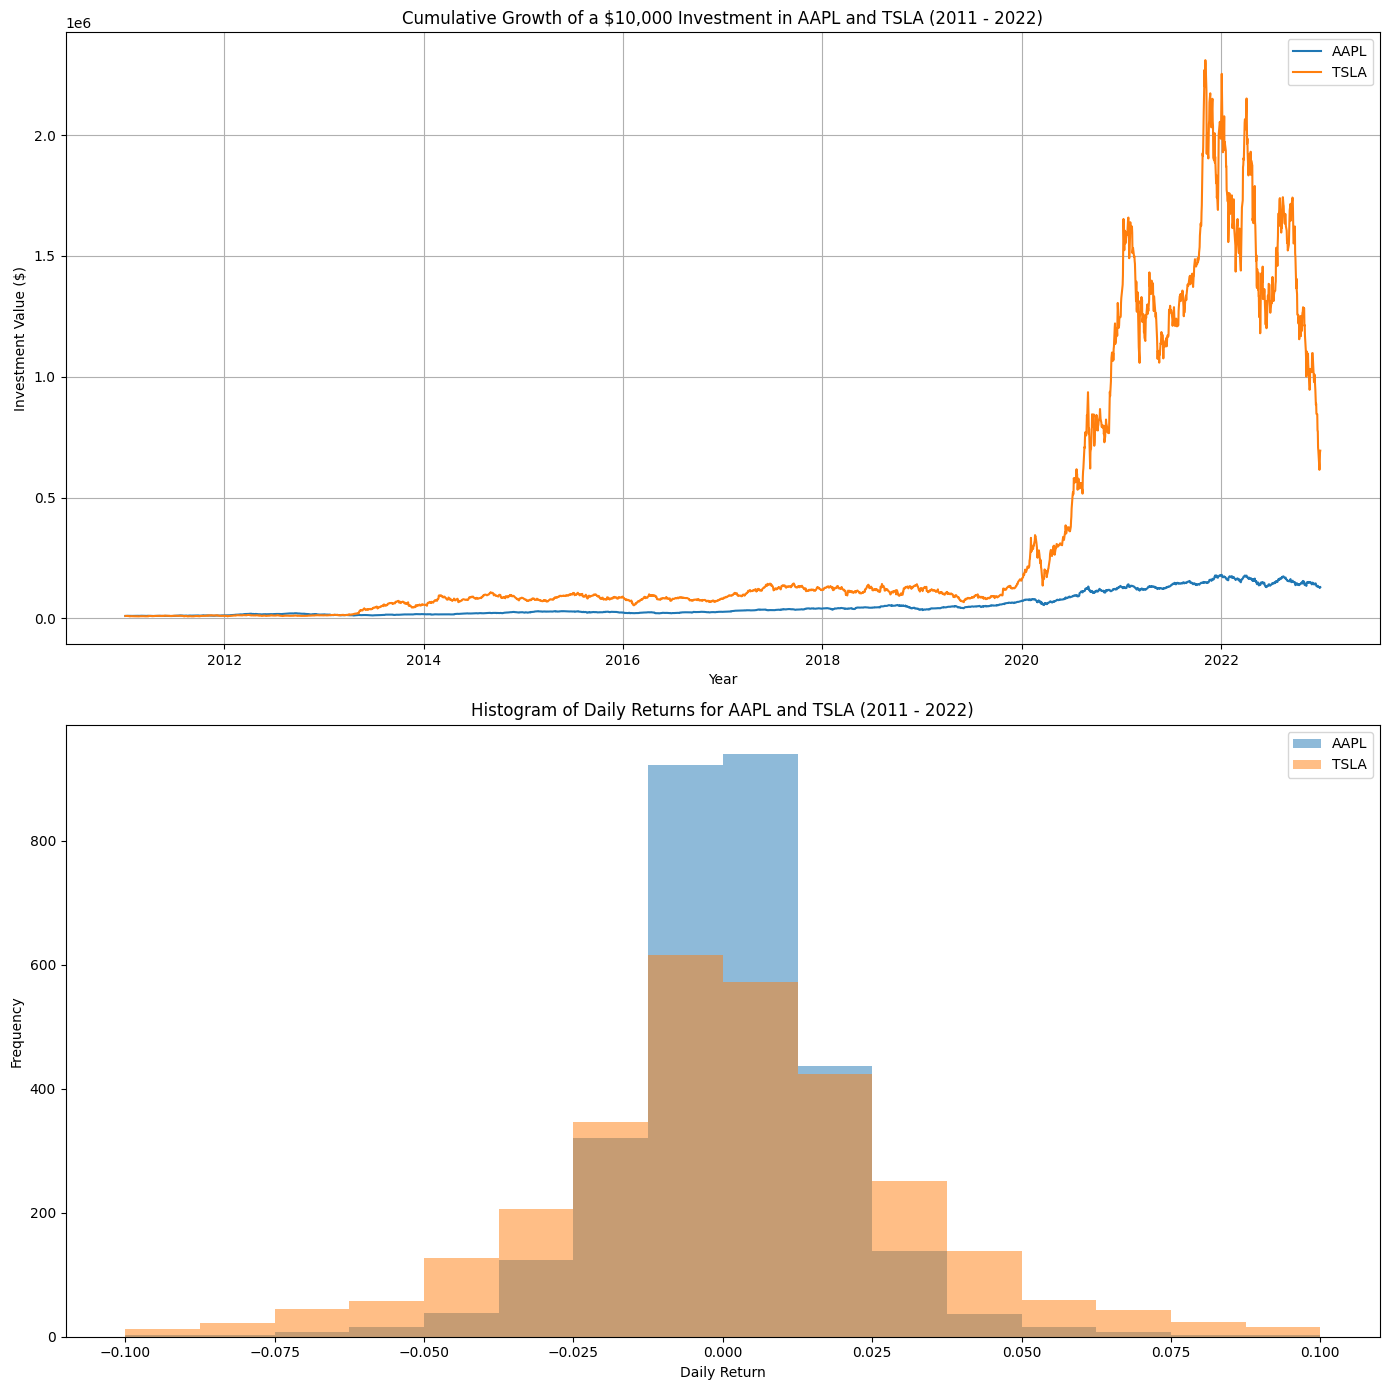

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

aapl = yf.download('AAPL', start='2011-01-01', end='2022-12-31')
tsla = yf.download('TSLA', start='2011-01-01', end='2022-12-31')

# Calculate daily returns
aapl['Daily Return'] = aapl['Adj Close'].pct_change()
tsla['Daily Return'] = tsla['Adj Close'].pct_change()

aapl['Cumulative Return'] = 10000 * (1 + aapl['Daily Return']).cumprod()
tsla['Cumulative Return'] = 10000 * (1 + tsla['Daily Return']).cumprod()

fig, ax = plt.subplots(2, 1, figsize=(14, 14))



range_min, range_max = -0.1, 0.1
bins = np.linspace(range_min, range_max, 17)

ax[0].plot(aapl.index, aapl['Cumulative Return'], label='AAPL')
ax[0].plot(tsla.index, tsla['Cumulative Return'], label='TSLA')
ax[0].set_title('Cumulative Growth of a $10,000 Investment in AAPL and TSLA (2011 - 2022)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Investment Value ($)')
ax[0].legend()
ax[0].grid(True)

ax[1].hist(aapl['Daily Return'].dropna(), bins=bins, alpha=0.5, label='AAPL')
ax[1].hist(tsla['Daily Return'].dropna(), bins=bins, alpha=0.5, label='TSLA')
ax[1].set_title('Histogram of Daily Returns for AAPL and TSLA (2011 - 2022)')
ax[1].set_xlabel('Daily Return')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout()
plt.show()


In [16]:
def calculate_variance_up_to_t(stock_data, time_t):
    """
    Calculate the variance of daily returns for a given stock up to a specified time t.

    Parameters:
    - stock_data: DataFrame containing the stock's data, including 'Daily Return'.
    - time_t: String specifying the end date for the variance calculation in the format 'YYYY-MM-DD'.

    Returns:
    - Variance of daily returns up to time t.
    """
    filtered_data = stock_data.loc[:time_t]
    
 
    variance = filtered_data['Daily Return'].var()
    
    return variance


time_t = '2022-12-31'
aapl_variance_up_to_t = calculate_variance_up_to_t(aapl, time_t)
print(f"Variance of AAPL's daily returns up to {time_t}: {aapl_variance_up_to_t}")

tsla_variance_up_to_t = calculate_variance_up_to_t(tsla, time_t)
print(f"Variance of TSLA's daily returns up to {time_t}: {tsla_variance_up_to_t}")


Variance of AAPL's daily returns up to 2022-12-31: 0.00033078953102116704
Variance of TSLA's daily returns up to 2022-12-31: 0.001261314489720419


In [17]:
def calculate_covariance_up_to_t(stock_data1, stock_data2, time_t):
    """
    Calculate the covariance between the daily returns of two stocks up to a specified time t.

    Parameters:
    - stock_data1: DataFrame containing the first stock's data, including 'Daily Return'.
    - stock_data2: DataFrame containing the second stock's data, including 'Daily Return'.
    - time_t: String specifying the end date for the covariance calculation in the format 'YYYY-MM-DD'.

    Returns:
    - Covariance between the daily returns of the two stocks up to time t.
    """

    filtered_data1 = stock_data1.loc[:time_t]['Daily Return']
    filtered_data2 = stock_data2.loc[:time_t]['Daily Return']
 
    aligned_data1, aligned_data2 = filtered_data1.align(filtered_data2, join='inner')

    covariance = aligned_data1.cov(aligned_data2)
    
    return covariance


time_t = '2022-12-31'
cov_aapl_tsla = calculate_covariance_up_to_t(aapl, tsla, time_t)
print(f"Covariance between AAPL and TSLA's daily returns up to {time_t}: {cov_aapl_tsla}")


Covariance between AAPL and TSLA's daily returns up to 2022-12-31: 0.000236815958777375


In [14]:
num_qubits = 5

npnum_qubits = 5

num_intervals = 2**num_qubits

interval_size = (range_max - range_min) / num_intervals
intervals = [(range_min + i * interval_size, range_min + (i+1) * interval_size) for i in range(num_intervals)]


